In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import classification_report

In [48]:
motion_df = pd.read_csv('Kinematics_Data.csv')
motion_df.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [49]:
motion_df.drop(['date','time','username'],axis=1,inplace=True)
motion_df.head()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


#### **Shape of Dataset**

In [50]:
motion_df.shape

(88588, 8)

#### **Check for NULL values**

In [51]:
motion_df.isnull().sum()

wrist             0
activity          0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
dtype: int64

#### **Distribution of Activity Variable(Target Variable)**

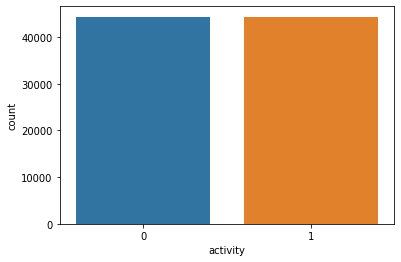

In [52]:
sns.countplot(x='activity',data=motion_df);

In [53]:
left_wrist = motion_df[motion_df.wrist == 0]
right_wrist = motion_df[motion_df.wrist == 1]

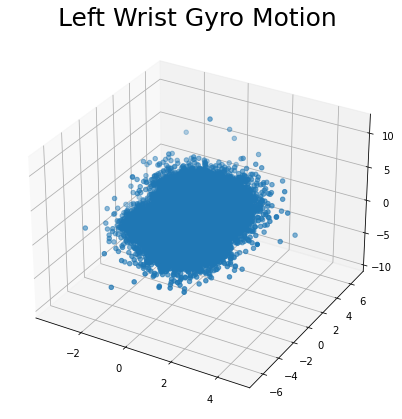

In [54]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(left_wrist.gyro_x, left_wrist.gyro_y, left_wrist.gyro_z)
plt.title("Left Wrist Gyro Motion",{'fontsize':25});
plt.show()

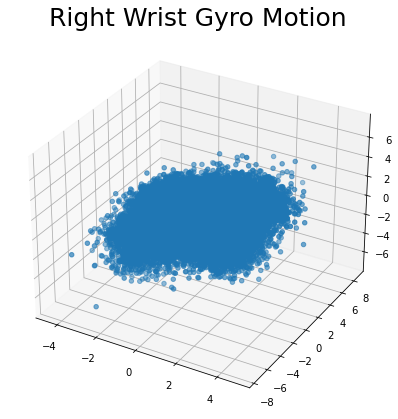

In [55]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(right_wrist.gyro_x, right_wrist.gyro_y, right_wrist.gyro_z)
plt.title("Right Wrist Gyro Motion",{'fontsize':25});
plt.show()

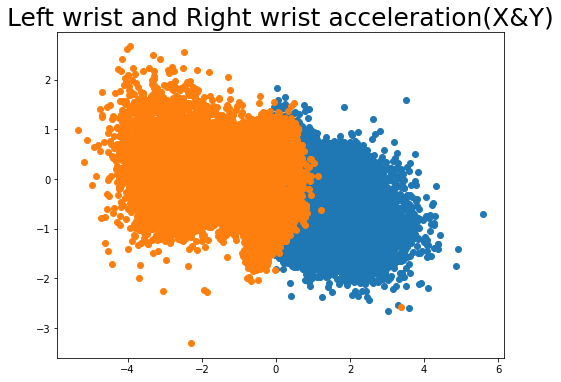

In [56]:
plt.figure(figsize=(8,6))
plt.scatter(x=left_wrist.acceleration_x,y=left_wrist.acceleration_y);
plt.scatter(x=right_wrist.acceleration_x,y=right_wrist.acceleration_y);
plt.title("Left wrist and Right wrist acceleration(X&Y)",{'fontsize':25});

#### **Split Data**

In [57]:
X = motion_df.drop('activity',axis=1)
y = motion_df.activity

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

#### **Model Training**

In [59]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=3000)
log_reg.fit(X_train,y_train)
log_reg.score(X_test,y_test)*100

86.05184934341725

In [62]:
log_reg_pred = log_reg.predict(X_test)
print(classification_report(y_test,log_reg_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87     13238
           1       0.90      0.81      0.85     13339

    accuracy                           0.86     26577
   macro avg       0.86      0.86      0.86     26577
weighted avg       0.86      0.86      0.86     26577



In [60]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf.score(X_test,y_test)*100

99.11577679948827

In [61]:
rf_pred = rf.predict(X_test)
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     13238
           1       0.99      0.99      0.99     13339

    accuracy                           0.99     26577
   macro avg       0.99      0.99      0.99     26577
weighted avg       0.99      0.99      0.99     26577

